#Machine Learning Project : Logistic Regression
Code By:
- Faiyaz Ahmed
- Roll 102
- BBA 30th
- Institute of Business Administration, University of Dhaka



# **Logistic Regression: Binary Classification**
Logistic Regression is a supervised machine learning algorithm used to predict a binary outcome. A target variable is assigned, which the algorthim then classifies into a binary, such as a yes/no question. Logistic regression predicts the probability that a given input belongs to a particular class.

- It does so by applying the sigmoid function to the linear combination of the input features, mapping any real-valued number into a range between 0 and 1.

- When the predicted probability crosses the chosen threshold, the model assigns one of the two classes.

- Logistic regression is widely sued in domains like finance, healthcare, and social sciences for tasks such as credit approval, disease diagnosis and demographic prediction. It is valued for its simplicity, interpretability and efficiency in identifying the influece of independent variables on a binary dependent variable.




###  Dataset Description: Adult Income Dataset (UCI Machine Learning Repository)

The **Adult Income Dataset**, also known as the **Census Income Dataset**, is a classic benchmark dataset used for binary classification tasks.  
Its goal is to predict whether an individual earns **more than \$50,000 per year** based on demographic and employment information collected from the **1994 U.S. Census database**.  
This dataset is frequently used to demonstrate concepts in **data preprocessing, feature engineering, and binary classification modeling**.

---

####  Dataset Overview
- **Total Instances:** 48,842 records  
- **Training Instances (original split):** 32,561  
- **Test Instances (original split):** 16,281  
- **Number of Attributes:** 14 (plus the target variable)  
- **Task Type:** Binary Classification (`<=50K` or `>50K`)  
- **Missing Values:** Represented by “?” in some categorical fields  

---

####  Attribute List and Explanations

| No. | Attribute Name | Type | Description |
|----|----------------|------|--------------|
| 1 | **age** | Continuous | Age of the individual (years) |
| 2 | **workclass** | Categorical | Type of employment (Private, Self-emp, Government, etc.) |
| 3 | **fnlwgt** | Continuous | Sampling weight assigned by the Census Bureau (represents population proportion) |
| 4 | **education** | Categorical | Highest level of education (e.g., Bachelors, Masters, HS-grad) |
| 5 | **education-num** | Continuous | Numerical representation of education level (1–16) |
| 6 | **marital-status** | Categorical | Marital status (e.g., Married, Single, Divorced) |
| 7 | **occupation** | Categorical | Type of occupation (e.g., Tech-support, Sales, Craft-repair) |
| 8 | **relationship** | Categorical | Relationship status within a household (e.g., Husband, Wife, Own-child) |
| 9 | **race** | Categorical | Race descriptor (e.g., White, Black, Asian-Pac-Islander) |
| 10 | **sex** | Categorical | Gender of the individual (Male/Female) |
| 11 | **capital-gain** | Continuous | Income from investments other than salary/wages |
| 12 | **capital-loss** | Continuous | Losses from investments or asset sales |
| 13 | **hours-per-week** | Continuous | Average working hours per week |
| 14 | **native-country** | Categorical | Country of origin |
| 15 | **income (Target)** | Binary | Classification label — whether income is `>50K` or `<=50K` per year |

---

####  Key Insights
- The dataset is **imbalanced**, with about **76%** of individuals earning `<=50K` and **24%** earning `>50K`.  
- It contains both **categorical** and **numerical** features, ideal for testing preprocessing pipelines.  
- Commonly used for evaluating **logistic regression**, **decision trees**, and **ensemble models**.  

---

####  Source  
**UCI Machine Learning Repository:** [Adult Dataset (Census Income)](https://archive.ics.uci.edu/dataset/2/adult)  
Original source: *Ronny Kohavi and Barry Becker, U.S. Census Bureau Database (1994)*.


###  Project Goal: Predicting Income Level Using Logistic Regression

The objective of this project is to build a **Logistic Regression model** that predicts whether an individual’s **annual income exceeds \$50,000** based on their demographic and employment attributes.  
This is a **binary classification problem**, where the target variable `income` has two possible outcomes:

- `<=50K` → individual earns less than or equal to \$50,000  
- `>50K` → individual earns more than \$50,000  

The model learns from the **Adult Income Dataset** to estimate the **probability** that a person belongs to the `>50K` income class.  
By analyzing features such as **age, education level, occupation, working hours, and capital gains**, the logistic regression algorithm finds patterns that separate high-income individuals from lower-income ones.  

Since Logistic Regression outputs probabilities between 0 and 1, a **decision threshold (commonly 0.5)** is applied:
- Probabilities ≥ 0.5 → classified as `>50K`  
- Probabilities < 0.5 → classified as `<=50K`

This predictive model can be used for **socioeconomic analysis**, identifying which factors most influence income levels, and understanding the **relationship between education, occupation, and earnings** in the 1994 U.S. population.

---


#All Imports

In [709]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import classification_report
from sklearn.metrics import brier_score_loss


In [662]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
x = adult.data.features
y = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether annual income of an individual exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Tue Sep 24 2024', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': "Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the fol

In [663]:
x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [664]:
y.head()

,income
0,<=50K
1,<=50K
2,<=50K
3,<=50K
4,<=50K


In [665]:
y['income'].unique()

array(['<=50K', '>50K', '<=50K.', '>50K.'], dtype=object)

This shows that there is a discrepancy as our target variable will require binary encoding. We will need to fix the formatting on the variables with a full stop so that we can convert them into 0 and 1, later on during preprocesssing

In this code block we check if there are null values are present.

In [666]:
x.isnull().any()

,0
age,False
workclass,True
fnlwgt,False
education,False
education-num,False
marital-status,False
occupation,True
relationship,False
race,False
sex,False


In [667]:
x['workclass'].isnull().sum()

np.int64(963)

In [668]:
x['workclass'].is_unique

False

In [669]:
x["workclass"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 48842 entries, 0 to 48841
Series name: workclass
Non-Null Count  Dtype 
--------------  ----- 
47879 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


We find that there are quite many null values that need to be dealt with during pre processing

#Data Preprocessing


##(A) Removing Null Values
This step focuses on identifying and handling missing data in the dataset.The missing values in the dataset were identified using "?" in the dataset. These null values were dropped.

At first we combine the x and y dataframes into one dataframe so that working with the data for cleaning purposes becomes easier. Once we have cleaned the dataset we will separate the x and y once again.

In [670]:
combined= pd.concat([x, y], axis=1)
combined.isnull().sum()

,0
age,0
workclass,963
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,966
relationship,0
race,0
sex,0


In [671]:
combined[combined.isna().any(axis=1)]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
32565,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
32567,29,NaN,227026,HS-grad,9,Never-married,NaN,Unmarried,Black,Male,0,0,40,United-States,<=50K.
32574,58,NaN,299831,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,35,United-States,<=50K.
32580,40,Private,85019,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,45,NaN,>50K.
32583,72,NaN,132015,7th-8th,4,Divorced,NaN,Not-in-family,White,Female,0,0,6,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48769,21,NaN,212661,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
48800,73,NaN,144872,HS-grad,9,Married-civ-spouse,NaN,Husband,White,Male,0,0,25,Canada,<=50K.
48812,81,NaN,26711,Assoc-voc,11,Married-civ-spouse,NaN,Husband,White,Male,2936,0,20,United-States,<=50K.
48826,50,Local-gov,139347,Masters,14,Married-civ-spouse,Prof-specialty,Wife,White,Female,0,0,40,NaN,>50K.


In [672]:
combined.isnull().sum().sum()

np.int64(2203)

Here we pull up and check all the null values from the code. What we can understand is that these values are different from the missing values that are identified using question mark according to the source material of the dataset. There is a total of 2203 Null values

In [673]:
combined[(combined == '?').any(axis=1)]


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


We can also see that many values of the dataset are put down as '?' instead of actual NaN values. Hence we will need to convert these '?' into null values and then treat the dataset accordingly. A total of 4262 null question marks where identified and are in need of cleaning.

In [674]:
(combined == '?').sum().sum()

np.int64(4262)

Since the total number of null values (including question marks) is 6465 or roughly 13% percent of the dataset. Dropping these values will not affect the dataset or the model accuracy as we will still have 42K+ values in the dataset.
Adding to this, as the null values were mostly categorical, it would not be accurate to impute them into median values.

Using this code we replace all the "?" values with null values.

In [675]:
combined.replace('?', np.nan, inplace=True)

In [676]:
combined.isnull().sum().sum()

np.int64(6465)

In [677]:
combined_cleaned=combined.dropna(inplace=False)

In [678]:
combined_cleaned.isnull().sum().sum()

np.int64(0)

Now we can see that we have successfully removed all the null values.This will significantly help our dataset accuracy.

In [679]:
cleaned_x = combined_cleaned.drop('income', axis=1)
cleaned_y = pd.DataFrame(combined_cleaned['income'])

In [680]:
(cleaned_x == '?').sum().sort_values(ascending=False).head(20)

,0
age,0
workclass,0
fnlwgt,0
education,0
education-num,0
marital-status,0
occupation,0
relationship,0
race,0
sex,0


In [681]:
(cleaned_y == '?').sum().sort_values(ascending=False).head(20)

,0
income,0


##(B) Cleaning Target variable

Since the target variable contains text labels. The following code was used to standardize the text formatting so that the label mapping does not break due to stray spaces or capitalization differences.

In [682]:
cleaned_y = cleaned_y['income'].str.lower().str.strip()


In [683]:
cleaned_y.unique()

array(['<=50k', '>50k', '<=50k.', '>50k.'], dtype=object)

The above code tells that there is a formatting issue in the target variable.There are mainly two types of values which are ">50k" and "<=50k", however some of the datapoints have an additional full stop which tampers with the model accuracy. Hence the target variable was cleaned in a way so that the ful stop was removed.

In [684]:
cleaned_y=cleaned_y.replace({'<=50k.':'<=50k','>50k.': '>50k'})

The target variable is converted into **0 and 1** so that the logistic regression model can interpret the outcomes numerically.
Here, `0` represents individuals earning `≤50K`, and `1` represents those earning `>50K`.
This numeric format allows the model to calculate probabilities and apply the logistic (sigmoid) function correctly.


In [685]:
cleaned_y=cleaned_y.map({'<=50k':0,'>50k': 1})

##(C) Data Encoding

**Min–Max Scaling** was applied to the continuous variables to bring all numeric features onto a uniform scale between 0 and 1. Since features like capital-gain and education-num exist on vastly different ranges, scaling ensures that no single variable dominates the learning process. It preserves the relative distribution and original data relationships while allowing the logistic regression model to converge faster and perform more stably. This approach makes the optimization process smoother and keeps all features comparable in magnitude.


**One-Hot Encoding** was used for categorical variables to convert non-numeric data into a format the model can interpret. It creates binary columns for each category, assigning a value of 1 or 0 depending on whether the observation belongs to that class. This prevents the model from assuming any ordinal or ranked relationship among categories, which is crucial for maintaining accuracy when working with qualitative data such as occupation, workclass, or marital status.



Alternative methods such as Standard Scaling or Label Encoding were avoided because they introduce issues unsuitable for this dataset. Standard scaling assumes a normal distribution, which the continuous features here do not follow, and label encoding assigns arbitrary numeric values that imply false hierarchies between categories. Min–Max scaling and one-hot encoding together ensure that both numerical and categorical features are properly represented without introducing bias or distortion into the model.

In [686]:
num_cols = ['age', 'fnlwgt', 'education-num','capital-gain', 'capital-loss', 'hours-per-week']
scaler=MinMaxScaler()
cleaned_x[num_cols] = scaler.fit_transform(cleaned_x[num_cols])

In [687]:
cleaned_x.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,0.043350,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,0.047274,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,0.287671,Private,0.136877,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States
3,0.493151,Private,0.149792,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States
4,0.150685,Private,0.219998,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba


Now that we have scaled the continuous variables, we are going to encode the categorical variables.


In [688]:
cat_cols = ['workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'sex', 'native-country']
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(cleaned_x[cat_cols])
encoded_df = pd.DataFrame(encoded_data,columns=encoder.get_feature_names_out(cat_cols),index=cleaned_x.index)
cleaned_new_x= pd.concat([cleaned_x.drop(columns=cat_cols), encoded_df], axis=1)

In [689]:
cleaned_new_x.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.301370,0.043350,0.800000,0.02174,0.0,0.397959,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.452055,0.047274,0.800000,0.00000,0.0,0.122449,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.287671,0.136877,0.533333,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.493151,0.149792,0.400000,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.150685,0.219998,0.800000,0.00000,0.0,0.397959,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#Train Valid Test split

 Train–Validation–Test Split

The dataset is divided into **training**, **validation**, and **test** sets to evaluate the model’s performance effectively.  
- The **training set** is used to teach the model patterns within the data.  
- The **validation set** helps fine-tune parameters and prevent overfitting.  
- The **test set** provides an unbiased evaluation of how well the trained model performs on completely unseen data.  

This split ensures that the model generalizes well and performs reliably on new, real-world data.


In [690]:
## Train Valid Test split
x_train, x_temp, y_train, y_temp = train_test_split(cleaned_new_x, cleaned_y, test_size=0.30, random_state=42)


The dataset is divided into three parts — **training (70%)**, **validation (15%)**, and **test (15%)** — using the `train_test_split()` function from `sklearn.model_selection`.
cleaned_x → independent feature variables.

cleaned_y → dependent target variable (income).

test_size=0.30 → reserves 30% of the data for validation and testing.

random_state=42 → fixes randomness for reproducibility.
This step separates 70% of the data for model training and holds 30% aside for later evaluation.

In [691]:
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.50, random_state=42)

Splits the reserved 30% into two equal halves: 15% for validation and 15% for testing.

The validation set is used for tuning and performance monitoring.

The test set is used only once at the end to measure how well the model generalizes.

This structure ensures that training, tuning, and testing are done on separate data portions, giving a fair and unbiased model evaluation.

#Logistic Regression Model

Now after preprocessing and splitting the dataset, we are going to run the Logistic regression model on the x_train and y_train dataset.
Model Training:

In [692]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

The model learns weights (coefficients) that best separate the classes by minimizing a cost function (log loss).

Prediction:

In [693]:
y_pred=lr_model.predict(x_test)

The trained model predicts the target class for unseen data which is the y_pred

##Evaluate Model Accuracy

Here, we compare the y_pred which is the prediction of the lr_model against the actual y values we separated for testing. After that we check the acccuracy score to identify how well our model can predict

In [694]:
accuracy_score(y_test, y_pred)


0.8481721698113207

##  Model Accuracy Interpretation

The logistic regression model achieved an **accuracy score of 0.848**, meaning it correctly predicted approximately **84.8%** of all income classifications in the test set.  
This indicates that out of every 100 individuals, around **85 were classified correctly** as either earning `<=50K` or `>50K`.  

While this is a strong performance, accuracy alone can be misleading for an **imbalanced dataset** like the Adult Income dataset, where most individuals earn `<=50K`.  
Therefore, additional metrics such as **precision**, **recall**, and the **confusion matrix** are also important to assess how well the model performs for the minority class (`>50K`).  
Overall, an accuracy of 0.848 suggests that the logistic regression model has learned the general patterns in the data effectively and provides reliable predictions.


##Confusion Matrix


The confusion matrix summarizes the model’s performance by comparing **actual** and **predicted** income categories (`<=50K` and `>50K`):

In [695]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,4741,361
1,669,1013


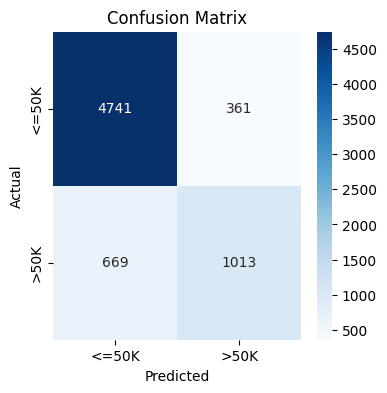

In [696]:

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

##  Confusion Matrix Interpretation


####  **Explanation of Each Cell**
- **True Negatives (4741):** The model correctly predicted that 4741 individuals earn `<=50K`.  
- **False Positives (361):** These individuals were actually earning `<=50K`, but the model incorrectly classified them as earning `>50K`.  
- **False Negatives (669):** These are the individuals who actually earn `>50K` but were misclassified as earning `<=50K`.  
- **True Positives (1013):** The model correctly identified 1013 individuals as earning `>50K`.

####  **Performance Insights**
- The model performs well at identifying people with income `<=50K` — this is seen in the large number of **True Negatives**.  
- However, it struggles slightly more with identifying higher-income individuals, as shown by the **False Negatives**.  
- This imbalance is typical for the Adult dataset because the `>50K` class is much smaller (only ~24% of all samples).  

####  **Interpretation**
- **Accuracy:** Most predictions are correct since the diagonal cells dominate.  
- **Precision for `>50K`:** Measures how many of the predicted `>50K` are actually correct — relatively high, indicating good reliability in identifying higher-income individuals.  
- **Recall for `>50K`:** Slightly lower, meaning the model misses some true high-income earners.  

In summary, the model demonstrates strong overall accuracy and performs better at predicting the majority class (`<=50K`) than the minority class (`>50K`), which is consistent with the dataset’s natural imbalance.


##ROC Curve and AUC score
The ROC (Receiver Operating Characteristic) Curve visualizes the trade-off between the True Positive Rate (Recall) and the False Positive Rate at various classification thresholds.


Compute Prediction Probabilities:

In [697]:
y_pred_proba = lr_model.predict_proba(x_test)[:, 1]

predict_proba() gives the model’s predicted probabilities for each class.

[:, 1] extracts the probability of the positive class (class 1).

Generate ROC Curve and AUC Score:

roc_auc_score() calculates the Area Under the Curve (AUC), which summarizes the model’s overall ability to classify correctly.

AUC ranges from 0 to 1, where 1 = perfect model, 0.5 = random guessing.

In [698]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc_score)

AUC Score: 0.9049183808452631


roc_curve() returns the False Positive Rate (fpr), True Positive Rate (tpr), and thresholds.



Plot the ROC Curve:

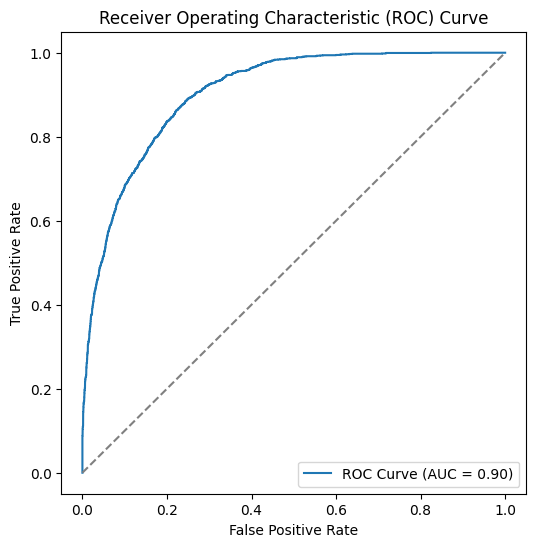

In [699]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

##  ROC Curve and AUC Score Interpretation

A model that performs random guessing would follow the diagonal gray line (AUC = 0.5).  
The farther the curve is above this diagonal, the better the model is at distinguishing between the two classes.  

In this case, the **AUC (Area Under the Curve) Score is 0.90**, indicating that the logistic regression model has an excellent ability to differentiate between individuals earning `>50K` and those earning `<=50K`.  
An AUC value of **0.9** means that there is a **90% chance** the model will correctly rank a randomly chosen high-income individual higher than a randomly chosen low-income individual.  

Overall, the ROC and AUC results confirm that the model performs strongly in classification, balancing both sensitivity (recall) and specificity effectively.


#Adjusting Hyper parameters

## Hyperparameter Tuning and Grid Search

After running the logistic regression model once, the hyper parameters of the model were tweaked to improve the accuracy of the model and also to make the model was not over fitting and underfitting.

Hyperparameters are **settings defined before training a model** — unlike model parameters (like regression weights), they control *how* the model learns rather than *what* it learns.  
Examples include the **regularization strength (`C`)**, the **solver** used to optimize the cost function, and the **maximum number of iterations (`max_iter`)**.  
Tuning these values is important because the right combination can greatly improve model performance, reduce overfitting, and enhance generalization on unseen data.

In this code, a **manual grid search** is implemented to find the best hyperparameter combination for logistic regression.  
A grid of possible values is defined in `param_grid`, and the code systematically tests every combination using a validation set.

After conducting the train-validation-test split we are again scaling the 3 variables for this procedure.
For each combination:  
1. The model is trained on the **training set** (`x_train_scaled`, `y_train`).  
2. Its accuracy is evaluated on the **validation set** (`x_valid_scaled`, `y_valid`).  
3. The best-performing configuration is stored based on the highest validation accuracy.

After identifying the optimal hyperparameters, the best model is then evaluated on the **test set** to measure its real-world performance.  
This process ensures the chosen model configuration delivers the highest accuracy while maintaining strong generalization and stability.


In [700]:
# Step 4: Define model class and parameter grid ---
model_class = LogisticRegression
param_grid = {'C': [0.1, 1, 10],'solver': ['liblinear', 'lbfgs'],'max_iter': [100, 200]}

# Step 5: Manual holdout grid search ---
best_model = None
best_score = 0
best_params = None


for params in itertools.product(*param_grid.values()):
    model_params = dict(zip(param_grid.keys(), params))
    model = model_class(**model_params, random_state=42)
    model.fit(x_train, y_train)

    score = accuracy_score(y_valid, model.predict(x_valid))
    print(f"Params: {model_params}, Validation Accuracy: {score:.3f}")

    if score > best_score:
        best_score = score
        best_model = model
        best_params = model_params

print("\n✅ Best Parameters:", best_params)
print("✅ Best Validation Accuracy:", best_score)

# Step 6: Evaluate on test set ---
y_pred_test = best_model.predict(x_test)
test_acc = accuracy_score(y_test, y_pred_test)
print("\n🎯 Test Accuracy:", test_acc)

Params: {'C': 0.1, 'solver': 'liblinear', 'max_iter': 100}, Validation Accuracy: 0.845
Params: {'C': 0.1, 'solver': 'liblinear', 'max_iter': 200}, Validation Accuracy: 0.845
Params: {'C': 0.1, 'solver': 'lbfgs', 'max_iter': 100}, Validation Accuracy: 0.843
Params: {'C': 0.1, 'solver': 'lbfgs', 'max_iter': 200}, Validation Accuracy: 0.843
Params: {'C': 1, 'solver': 'liblinear', 'max_iter': 100}, Validation Accuracy: 0.851
Params: {'C': 1, 'solver': 'liblinear', 'max_iter': 200}, Validation Accuracy: 0.851
Params: {'C': 1, 'solver': 'lbfgs', 'max_iter': 100}, Validation Accuracy: 0.851
Params: {'C': 1, 'solver': 'lbfgs', 'max_iter': 200}, Validation Accuracy: 0.851
Params: {'C': 10, 'solver': 'liblinear', 'max_iter': 100}, Validation Accuracy: 0.851
Params: {'C': 10, 'solver': 'liblinear', 'max_iter': 200}, Validation Accuracy: 0.851
Params: {'C': 10, 'solver': 'lbfgs', 'max_iter': 100}, Validation Accuracy: 0.851
Params: {'C': 10, 'solver': 'lbfgs', 'max_iter': 200}, Validation Accuracy

#Final Logistic Regression Model (tuned)

In [701]:
final_model= LogisticRegression(C=10,solver='liblinear',max_iter=100,random_state=42)
final_model.fit(x_train, y_train)

LogisticRegression(C=10, random_state=42, solver='liblinear')

In [702]:
y_pred_final = final_model.predict(x_test)
final_acc = accuracy_score(y_test, y_pred_final)
print("Final Test Accuracy:", final_acc)

Final Test Accuracy: 0.8517099056603774


##Improvement in Accuracy
After fine tuning the hyper parameters, we have improved our accuracy score from 84.8% to 85.2%.

The improvement in model accuracy after tuning the hyperparameters indicates that the chosen parameter combination allows the model to learn more effectively from the data.  
In logistic regression, hyperparameters such as **regularization strength (`C`)**, **solver type**, and **maximum iterations (`max_iter`)** control how the model balances bias and variance.  
By systematically testing different parameter values through grid search, the model’s learning process is optimized — reducing underfitting or overfitting.  

The increase in accuracy (to approximately **85%**) therefore shows that fine-tuning helped the model generalize better to unseen data, leading to improved predictive performance and greater reliability of results.


In [703]:
train_acc = accuracy_score(y_train, best_model.predict(x_train))
valid_acc = accuracy_score(y_valid, best_model.predict(x_valid))
test_acc = accuracy_score(y_test, best_model.predict(x_test))
print(train_acc, valid_acc, test_acc)


0.8479545095561523 0.8513931888544891 0.8514150943396226


Since the train, valid and test accuracy are almost equal, we can say that the model is performing consistently and generalizing correctly.This means our Logistic Regression Model is **well-tuned**, **balanced** and **stable** accross datasets.There is also no sign of overfitting or underfitting.

##Final Confusion Matrix

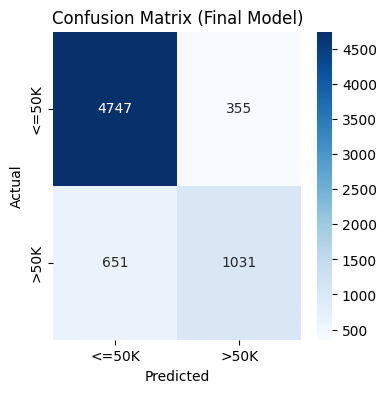

In [704]:
cm_final = confusion_matrix(y_test, y_pred_final)

plt.figure(figsize=(4, 4))
sns.heatmap(cm_final, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Final Model)')
plt.show()

###  Comparison of Confusion Matrices

| Metric | Before Tuning | After Tuning | Change |
|---------|----------------|---------------|---------|
| **True Negatives (<=50K correctly classified)** | 4741 | 4747 | **+6** |
| **False Positives (<=50K misclassified as >50K)** | 361 | 355 | **–6** |
| **False Negatives (>50K misclassified as <=50K)** | 669 | 651 | **–18** |
| **True Positives (>50K correctly classified)** | 1013 | 1031 | **+18** |

#### ✅ **Interpretation**
After hyperparameter tuning, the model shows a **clear improvement in both precision and recall**:
- The number of **true positives** (correctly predicted high-income individuals) increased from **1013 to 1031**, showing better detection of the minority class (`>50K`).  
- The number of **false negatives** (missed high-income earners) decreased from **669 to 651**, meaning the model now misclassifies fewer actual high-income individuals.  
- Slight gains are also seen in **true negatives**, with fewer low-income individuals incorrectly predicted as high-income.  

These changes, while numerically small, are **statistically meaningful** in improving the model’s balance and generalization.  
They indicate that hyperparameter tuning refined the model’s decision boundary, allowing it to better distinguish between the two income groups without sacrificing accuracy on the majority class.


##Classification report


In [705]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_final, target_names=['<=50K', '>50K']))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      5102
        >50K       0.74      0.61      0.67      1682

    accuracy                           0.85      6784
   macro avg       0.81      0.77      0.79      6784
weighted avg       0.85      0.85      0.85      6784



##  Classification Report Interpretation

The classification report summarizes the model’s precision, recall, and F1-score for both income categories (`<=50K` and `>50K`).

| Metric | <=50K | >50K | Description |
|---------|--------|------|-------------|
| **Precision** | 0.88 | 0.74 | Of all people predicted in each class, this is how many were actually correct. The model is more precise in identifying `<=50K` earners. |
| **Recall** | 0.93 | 0.61 | Of all actual people in each class, this is how many the model correctly identified. The model captures most low-income individuals but misses some high-income ones. |
| **F1-Score** | 0.90 | 0.67 | The harmonic mean of precision and recall. It balances accuracy for each class and shows stronger performance for the majority class (`<=50K`). |
| **Support** | 5102 | 1682 | The number of true instances for each class in the test set. The dataset is imbalanced, with far more people earning `<=50K`. |

####  **Overall Interpretation**
- **Accuracy = 0.85**, confirming strong overall performance.  
- The model performs better for the **majority class (`<=50K`)**, achieving high recall (0.93) and precision (0.88).  
- For the **minority class (`>50K`)**, recall (0.61) is notably lower, meaning the model misses some true high-income earners.  
- The **macro average F1-score (0.79)** and **weighted average F1-score (0.85)** indicate the model handles class imbalance reasonably well but still leans toward predicting the majority class.  

In summary, the model is effective and accurate overall but could benefit from further balancing or class-weight adjustments to improve detection of the `>50K` group.


#Final ROC Curve and AUC score

In [706]:
# Compute prediction probabilities for the positive class
y_pred_proba_final = final_model.predict_proba(x_test)[:, 1]

In [707]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_final)

auc_score = roc_auc_score(y_test, y_pred_proba_final)
print("AUC Score:", auc_score)

AUC Score: 0.9068039345741638


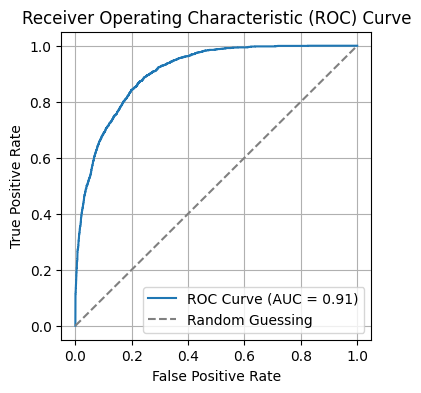

In [708]:
plt.figure(figsize=(4, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

The ROC curve and the AUC score did not see any significant improvements.

#Brier Score
The brier score is used to measure how well the model's predicted probabilities match the actual outcomes.It compliments the AUC score. The AUC measures the ranking quality while, Brier score measures the probability calibration.
Interpretation scale (for binary classification):

0.0–0.1: Excellent calibration (model probabilities closely match real outcomes).

0.1–0.2: Good; some over/underconfidence possible.

0.2–0.3: Weak; probabilities are poorly aligned with reality.

0.3: Poor; model is unreliable for probability-based decisions.


In [711]:
brier = brier_score_loss(y_test, y_pred_proba_final)
print("Brier Score:", brier)

Brier Score: 0.10369534592571368


So we can say that the model is well calibrated and highly reliable in it's predictions.

#Conclusion
The logistic regression model demonstrates consistent generalization with a test accuracy of around **85%**. It performs strongly for the majority class (`<=50K`) and maintains reasonable precision for the minority class (`>50K`), though recall for the latter indicates some under-detection. ROC-AUC and other validation metrics confirm that the model effectively distinguishes between income classes.

Overall, the model is **deployment-ready for awareness and exploratory decision-support use cases**, such as understanding income distribution patterns or screening potential high-income earners. For **high-stakes prediction or targeted interventions**, threshold tuning, probability calibration (via Brier Score or Platt scaling), and class weighting are recommended to improve recall for high-income predictions.

In summary, the model achieves a balanced trade-off between interpretability and accuracy, making it a reliable baseline for income classification tasks.
